In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Here we follow 3 techniques - SMOTETomek, Randomoversampling, Hybrid
# In oversampling/upsampling we try to increase the no. of samples in minority dataset to match the no. of samples in majority dataset.
# This way information is not lost and data modelling output wouldnt be biased too.

In [3]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Total no. of fraud transactions
fraud = data[data['Class']==1]
len(fraud)

492

In [7]:
# Total no. of genuine transactions
genuine = data[data['Class']==0]
len(genuine)

284315

Text(0,0.5,'count')

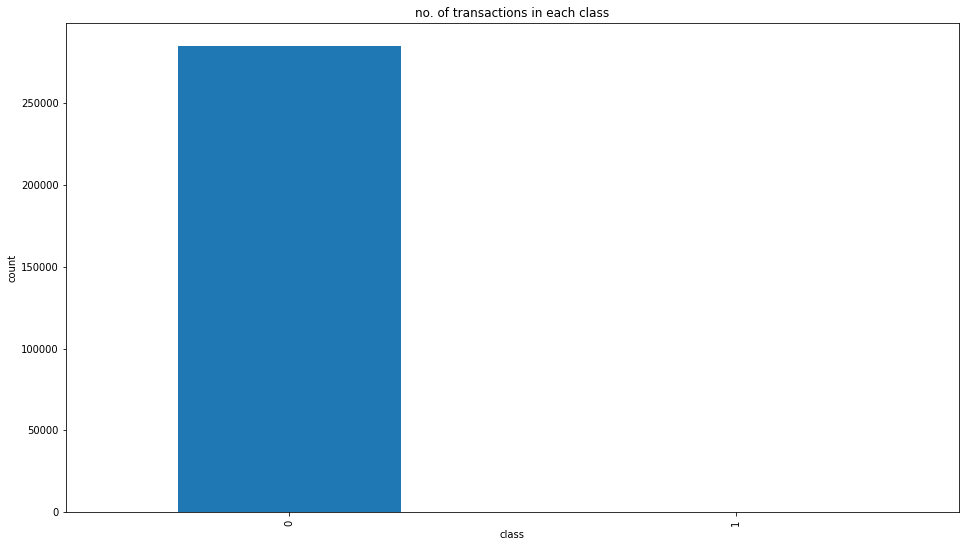

In [8]:
# comparison of fraud & genuine transactions data
plt.figure(figsize=(16,9))
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind='bar')
plt.title('no. of transactions in each class')
plt.xlabel('class')
plt.ylabel('count')

In [10]:
# Clearly shows high data imbalance, shows more no. of genuine transactions
# split data to x & y
x = data.drop(['Class'],axis=1)
y = data['Class']

In [13]:
# Method 1 : SMOTETomek
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 42)
x_res,y_res = smk.fit_sample(x,y)
x_res.shape,y_res.shape

((568096, 30), (568096,))

In [18]:
# compare shape of original & sampled dataset
from collections import Counter
print('original dataset shape is {}'. format(Counter(y)))
print('sampled dataset shape is {}'. format(Counter(y_res)))

original dataset shape is Counter({0L: 284315, 1L: 492})
sampled dataset shape is Counter({0: 284315, 1: 283781})


In [21]:
# Method 2 : RandomOverSampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(ratio = 0.5)
x1_res,y1_res = ros.fit_sample(x,y)
x1_res.shape,y1_res.shape

((426472, 30), (426472,))

In [23]:
# compare shape of original & sampled dataset
print('original dataset shape is {}'.format(Counter(y)))
print('sampled dataset shape is {}'.format(Counter(y1_res)))

original dataset shape is Counter({0L: 284315, 1L: 492})
sampled dataset shape is Counter({0: 284315, 1: 142157})


In [24]:
# Mthod 3 : Hybrid
smk1 = SMOTETomek(ratio = 0.5)
x2_res,y2_res = smk1.fit_sample(x,y)
x2_res.shape,y2_res.shape

((425642, 30), (425642,))

In [25]:
# compare shape of original & sampled dataset
print('original dataset shape is {}'.format(Counter(y)))
print('sampled dataset shape is {}'.format(Counter(y2_res)))

original dataset shape is Counter({0L: 284315, 1L: 492})
sampled dataset shape is Counter({0: 283485, 1: 142157})
